In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from pickle import dump

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# load data
df = pd.read_csv('Composition_Yield_New_Strain_with_SRO_161_data.csv')
df.head()

,Al (at%),Co (at%),Cr (at%),Fe (at%),Ni (at%),Yield Stress (GPa)
0,0.05,0.35,0.2,0.2,0.2,11.0897
1,0.06,0.34,0.2,0.2,0.2,10.4649
2,0.07,0.33,0.2,0.2,0.2,10.2925
3,0.08,0.32,0.2,0.2,0.2,9.7913
4,0.09,0.31,0.2,0.2,0.2,9.5492


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Al (at%)            160 non-null    float64
 1   Co (at%)            160 non-null    float64
 2   Cr (at%)            160 non-null    float64
 3   Fe (at%)            160 non-null    float64
 4   Ni (at%)            160 non-null    float64
 5   Yield Stress (GPa)  160 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [5]:
# Split data into X and y
y = df['Yield Stress (GPa)']
X = df.drop(['Yield Stress (GPa)'], axis=1)

#The two following lines could be used to select only part of the columns: 
#X = dataset[['VEC','E/A', 'Ec', 'Mixing_Entropy', 'EWF', 'Mod_Mismatch', 'Mixing_Enthalpy', 'Atomic_Radius_Diff', 'Electronegativity_Difference',
#           'Cond__PM', 'Cond__AC',  'Cond__AM', 'Cond__HM', 'Cond__WR']]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.20, 
                                                    random_state=42)

#Applying standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#The following line can be used to save the standarscaler:
#dump(sc, open('/Scaler/scaler.pkl', 'wb'))

In [6]:
# Function to build the model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[5], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer=optimizer,
#                  loss=tf.keras.metrics.mean_squared_error,
#                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
               loss='mse',               
                metrics=['mae', 'mse'])
    return model

In [7]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(5,), reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))  # Here, use the correct input shape.
    
    # Add hidden layers.
    for _ in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                               activation='elu'))
        model.add(layers.Dropout(dropout))
    
    # Add the output layer.
    model.add(keras.layers.Dense(1))  # No need for options for the output layer.
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(optimizer=optimizer,
                  loss='mse',               
                  metrics=['mae', 'mse'])
    return model

# Build the model using the function with appropriate input shape
model = build_model(n_hidden=3, n_neurons=60, learning_rate=0.0005, reg_l2=0.0001, dropout=0.20)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,741 (30.24 KB)

 Trainable params: 7,741 (30.24 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.20, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()], batch_size=4)


Epoch: 0, loss:53.0014,  mae:5.6152,  mse:52.9883,  val_loss:43.0632,  val_mae:5.1411,  val_mse:43.0501,  
....................................................................................................
Epoch: 100, loss:1.8657,  mae:1.0021,  mse:1.8513,  val_loss:1.6488,  val_mae:0.8513,  val_mse:1.6344,  
....................................................................................................
Epoch: 200, loss:1.7352,  mae:0.9524,  mse:1.7199,  val_loss:1.4649,  val_mae:0.7800,  val_mse:1.4496,  
....................................................................................................
Epoch: 300, loss:1.7680,  mae:1.0100,  mse:1.7520,  val_loss:1.4087,  val_mae:0.7979,  val_mse:1.3927,  
....................................................................................................
Epoch: 400, loss:1.3657,  mae:0.8675,  mse:1.3490,  val_loss:1.4871,  val_mae:0.8117,  val_mse:1.4704,  
....................................................................

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.949448,0.746487,0.929455,1.260256,0.753941,1.240225,995
996,1.165622,0.740995,1.145592,1.322861,0.713718,1.302873,996
997,1.270318,0.815243,1.250307,1.467133,0.732193,1.447126,997
998,1.529063,0.972084,1.509014,1.369539,0.757002,1.349435,998
999,0.996399,0.756720,0.976342,1.499577,0.777923,1.479540,999


Text(0, 0.5, 'MAE [Yield Stress (GPa)]')

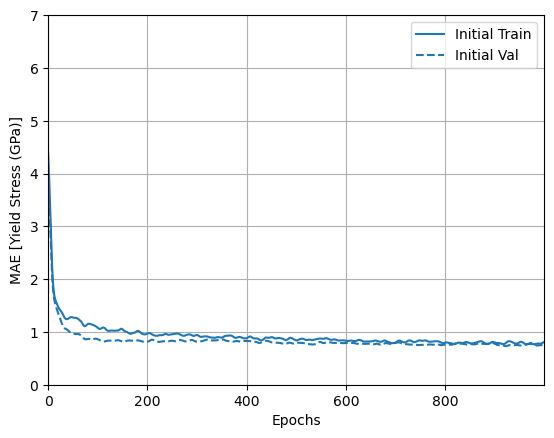

In [11]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=3)
plotter.plot({'Initial': history}, metric = "mae")
plt.ylim([0, 7])
plt.ylabel('MAE [Yield Stress (GPa)]')

Text(0, 0.5, 'MSE [Yield Stress (GPa)^2]')

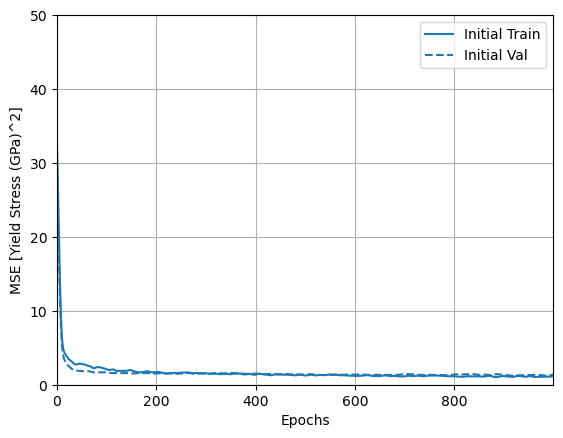

In [12]:
plotter.plot({'Initial': history}, metric = "mse")
plt.ylim([0, 50])
plt.ylabel('MSE [Yield Stress (GPa)^2]')

In [13]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Yield Stress (GPa)".format(mae))

1/1 - 0s - 36ms/step - loss: 0.7358 - mae: 0.6033 - mse: 0.7158
Testing set Mean Abs Error:  0.60 Yield Stress (GPa)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


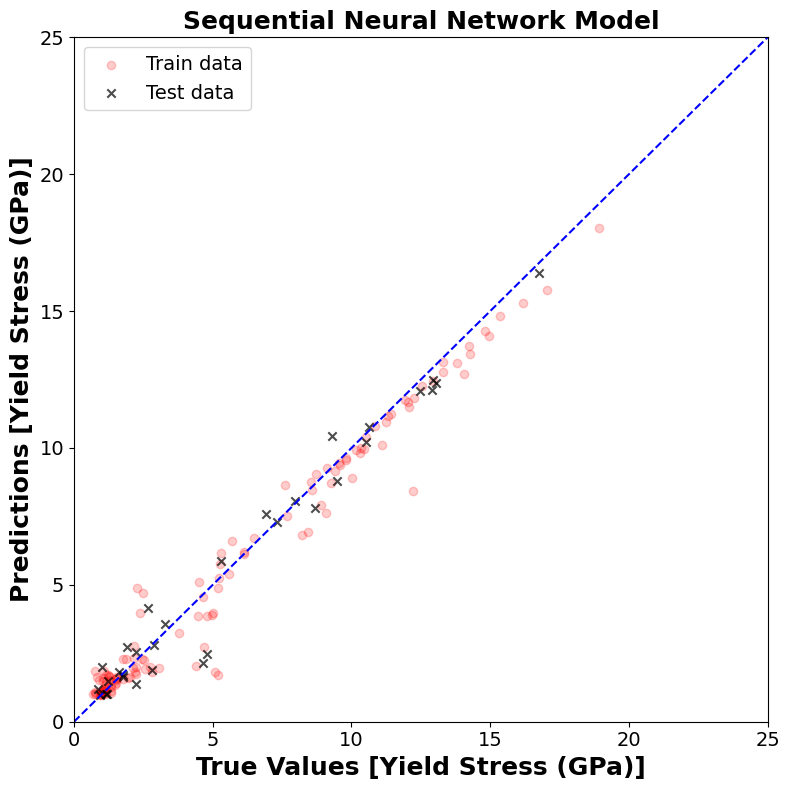

In [14]:
test_predictions = model.predict(X_test).flatten()
train_predictions = model.predict(X_train).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

# Plot train data
plt.scatter(y_train, train_predictions, c='red', alpha=0.2, label='Train data', marker='o')

# Plot test data
plt.scatter(y_test, test_predictions, c='black', alpha=0.7, label='Test data', marker='x')

# Set labels and title
plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.title('Sequential Neural Network Model', fontsize=18, fontweight='bold')

# Set plot limits
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)

# Set the tick parameters
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(loc="upper left", fontsize=14)

# Plot diagonal line
plt.plot(lims, lims, color='blue', linestyle='--')

# Save figure
plt.tight_layout()  # Adjust layout for better appearance
#plt.savefig('Sequential Neural Network predicted_vs_actual_plot.png', dpi=300)

# Show plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


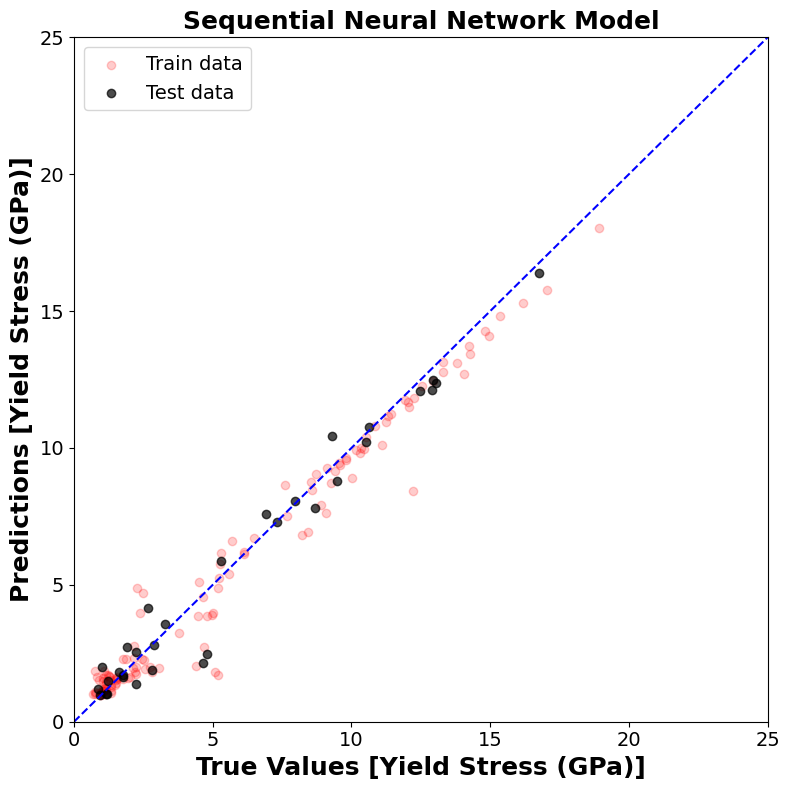

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Make EPS Illustrator-friendly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

# Predictions (flatten for Keras models)
test_predictions = model.predict(X_test).flatten()
train_predictions = model.predict(X_train).flatten()

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_train, train_predictions, c='red', alpha=0.2, label='Train data', marker='o')
plt.scatter(y_test, test_predictions, c='black', alpha=0.7, label='Test data', marker='o')  # circular black dots

plt.xlabel('True Values [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.ylabel('Predictions [Yield Stress (GPa)]', fontsize=18, fontweight='bold')
plt.title('Sequential Neural Network Model', fontsize=18, fontweight='bold')

lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.plot(lims, lims, color='blue', linestyle='--')

plt.tight_layout()

# Save as EPS (Illustrator-friendly)
plt.savefig('sequential_nn_actual_vs_predicted.eps', format='eps', bbox_inches='tight', pad_inches=0.02)

# Optional: also save as PNG for quick viewing
plt.savefig('sequential_nn_actual_vs_predicted.png', dpi=300)

plt.show()


In [16]:
# Make predictions on the test set
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [17]:
# Check lengths after splitting
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Train)': y_train,
    'Predicted (Train)': train_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Neural Network train predicted_actual_values.xlsx', index=False)

Length of X_train: 128
Length of y_train: 128


In [18]:
# Check lengths after splitting
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({
    'Actual (Test)': y_test,
    'Predicted (Test)': test_predictions})

# Save the DataFrame to an Excel file
results_df.to_excel('Neural Network test predicted_actual_values.xlsx', index=False)

Length of X_test: 32
Length of y_test: 32


In [19]:
# calculate these metrics by hand!
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('NRMSE:', nrmse)

MAE: 0.603290466094017
MSE: 0.7157902303911674
RMSE: 0.8460438702521089
NRMSE: 0.0532967878855066


In [20]:
from sklearn.metrics import r2_score

# Assuming 'predictions' is the predicted values and 'Y_test' is the true values
r2_value_train = r2_score(y_train, train_predictions)
r2_value_test = r2_score(y_test, test_predictions)

# Print or use the R-squared value
print(f'R-squared value of train data: {r2_value_train}')
print(f'R-squared value of test data: {r2_value_test}')

R-squared value of train data: 0.9669156848657631
R-squared value of test data: 0.9657401565496349


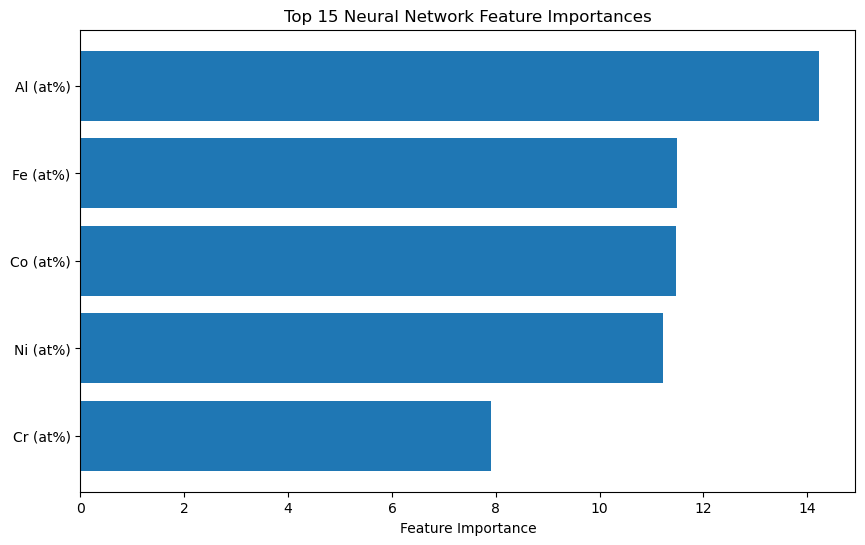

In [21]:
# Assuming you have a trained model named 'model' (replace 'model' with your actual model name)

# Extract the weights from the first layer (adjust the layer index as needed)
weights_first_layer = model.layers[0].get_weights()[0]

# Calculate feature importance as the sum of absolute weights for each feature
feature_importances = np.sum(np.abs(weights_first_layer), axis=1)

# Get feature names (make sure 'X_train' is your data and 'X_train.columns' is defined)
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

# Select the top 8 features
top_n = 5
sorted_idx_top = sorted_idx[-top_n:]

# Plot top 8 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[sorted_idx_top], align='center')
plt.yticks(range(top_n), feature_names[sorted_idx_top])
plt.xlabel('Feature Importance')
plt.title('Top 15 Neural Network Feature Importances')
plt.savefig('Top_15_Neural_Network_Feature_Importances.png', dpi=300)
plt.show()

In [22]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow import keras


In [23]:
# Example: if your DataFrame is called df
# and the target column is 'Yield Stress (GPa)'
X = df.drop('Yield Stress (GPa)', axis=1).values
y = df['Yield Stress (GPa)'].values

# Or if you already have X and y, skip this step.

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
train_r2_scores = []
test_r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

In [26]:
EPOCHS = 1000
BATCH_SIZE = 4

fold_number = 1

for train_index, test_index in kf.split(X):
    print(f"\n===== FOLD {fold_number} =====")
    
    # Split data into training & test subsets for this fold
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Build the model with the same parameters you used before
    # (Adjust these to match your desired configuration)
    model = build_model(
        n_hidden=3, 
        n_neurons=60, 
        learning_rate=0.0005, 
        reg_l2=0.0001, 
        dropout=0.20,
        input_shape=(X.shape[1],)  # X.shape[1] is the number of features
    )

    # Train the model on this fold's training set
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_test_fold, y_test_fold),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=0  # set to 1 for detailed output
    )

    # Predictions for both training and test folds
    y_train_pred = model.predict(X_train_fold).flatten()
    y_test_pred = model.predict(X_test_fold).flatten()

    # Compute metrics
    train_r2 = r2_score(y_train_fold, y_train_pred)
    test_r2 = r2_score(y_test_fold, y_test_pred)
    mae = mean_absolute_error(y_test_fold, y_test_pred)
    mse = mean_squared_error(y_test_fold, y_test_pred)
    rmse = np.sqrt(mse)

    # Store them for later averaging
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    # Print metrics for this fold
    print(f"Fold {fold_number} - Train R²: {train_r2:.3f} | Test R²: {test_r2:.3f} | "
          f"MAE: {mae:.3f} | MSE: {mse:.3f} | RMSE: {rmse:.3f}")

    fold_number += 1



===== FOLD 1 =====
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Fold 1 - Train R²: 0.954 | Test R²: 0.963 | MAE: 0.678 | MSE: 0.774 | RMSE: 0.880

===== FOLD 2 =====
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Fold 2 - Train R²: 0.959 | Test R²: 0.953 | MAE: 0.770 | MSE: 1.021 | RMSE: 1.011

===== FOLD 3 =====
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Fold 3 - Train R²: 0.953 | Test R²: 0.964 | MAE: 0.707 | MSE: 0.987 | RMSE: 0.993

===== FOLD 4 =====
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Fold 4 - Train R²: 0.961 | Test R²: 0.934 | MAE: 0.801 | MSE: 1.169 | RMSE: 1.081

===== FOLD 5 =====
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Fold 5 - Train R²: 0.960 | Test R²: 0.941 | MAE: 0.799 | MSE: 1.393 | RMSE: 1.180


In [27]:
print("\n===== CROSS-VALIDATION SUMMARY =====")
print("Train R² for each fold:", train_r2_scores)
print("Test R² for each fold:", test_r2_scores)
print("MAE for each fold:", mae_scores)
print("MSE for each fold:", mse_scores)
print("RMSE for each fold:", rmse_scores)

print(f"\nAverage Train R²: {np.mean(train_r2_scores):.3f}")
print(f"Average Test R²: {np.mean(test_r2_scores):.3f}")
print(f"Average MAE: {np.mean(mae_scores):.3f}")
print(f"Average MSE: {np.mean(mse_scores):.3f}")
print(f"Average RMSE: {np.mean(rmse_scores):.3f}")


===== CROSS-VALIDATION SUMMARY =====
Train R² for each fold: [0.9544122755840919, 0.9588955825549474, 0.9527568179650836, 0.9611913841395394, 0.9599040236450731]
Test R² for each fold: [0.962948648869253, 0.9532959155901166, 0.9644202555451588, 0.9341912487955735, 0.9413374422441236]
MAE for each fold: [0.6782119403064251, 0.7701529823958873, 0.706778008133173, 0.8008762801229954, 0.7987985010385514]
MSE for each fold: [0.7741131450470408, 1.0214840810050871, 0.9865193114302585, 1.168706472409248, 1.3929878597684415]
RMSE for each fold: [np.float64(0.8798369991350903), np.float64(1.0106849563563747), np.float64(0.9932367851777634), np.float64(1.0810672839417756), np.float64(1.1802490668365053)]

Average Train R²: 0.957
Average Test R²: 0.951
Average MAE: 0.751
Average MSE: 1.069
Average RMSE: 1.029
